In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("D:/Downloads/crop_yield.csv/crop_yield.csv")

In [4]:
data.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [5]:
data.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [6]:
print(f"The number of rows are: {data.shape[0]}\nThe number of columns are: {data.shape[1]}")

The number of rows are: 1000000
The number of columns are: 10


In [7]:
data_sample = data.sample(n = 100000,random_state = 42)

In [8]:
print(f"The number of rows are: {data_sample.shape[0]}\nThe number of columns are: {data_sample.shape[1]}")

The number of rows are: 100000
The number of columns are: 10


In [9]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 987231 to 573083
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  100000 non-null  object 
 1   Soil_Type               100000 non-null  object 
 2   Crop                    100000 non-null  object 
 3   Rainfall_mm             100000 non-null  float64
 4   Temperature_Celsius     100000 non-null  float64
 5   Fertilizer_Used         100000 non-null  bool   
 6   Irrigation_Used         100000 non-null  bool   
 7   Weather_Condition       100000 non-null  object 
 8   Days_to_Harvest         100000 non-null  int64  
 9   Yield_tons_per_hectare  100000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 7.1+ MB


In [10]:
print(data_sample.isnull().sum())

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64


In [11]:
print("Duplicates: ",data_sample.duplicated().sum())

Duplicates:  0


In [12]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 987231 to 573083
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  100000 non-null  object 
 1   Soil_Type               100000 non-null  object 
 2   Crop                    100000 non-null  object 
 3   Rainfall_mm             100000 non-null  float64
 4   Temperature_Celsius     100000 non-null  float64
 5   Fertilizer_Used         100000 non-null  bool   
 6   Irrigation_Used         100000 non-null  bool   
 7   Weather_Condition       100000 non-null  object 
 8   Days_to_Harvest         100000 non-null  int64  
 9   Yield_tons_per_hectare  100000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 7.1+ MB


In [13]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
def transform(data_sample,colmns):
    for colmn in colmns:
        if data_sample[colmn].dtype == 'object':
            le = LabelEncoder()
            data_sample[colmn] = le.fit_transform(data_sample[colmn])
    return data_sample
colmns = ['Region','Soil_Type','Crop','Weather_Condition']
trns = transform(data_sample,colmns)    
data_sample.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
987231,3,5,1,714.854403,23.875872,False,False,2,120,3.840988
79954,1,0,1,860.604672,23.070897,False,False,1,78,5.138173
567130,1,4,0,802.081954,24.020125,True,True,1,140,6.401523
500891,3,0,1,203.616909,16.895211,False,True,2,96,2.658805
55399,0,5,3,510.528102,18.402903,False,True,0,65,2.797703


In [16]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 987231 to 573083
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  100000 non-null  int64  
 1   Soil_Type               100000 non-null  int64  
 2   Crop                    100000 non-null  int64  
 3   Rainfall_mm             100000 non-null  float64
 4   Temperature_Celsius     100000 non-null  float64
 5   Fertilizer_Used         100000 non-null  bool   
 6   Irrigation_Used         100000 non-null  bool   
 7   Weather_Condition       100000 non-null  int64  
 8   Days_to_Harvest         100000 non-null  int64  
 9   Yield_tons_per_hectare  100000 non-null  float64
dtypes: bool(2), float64(3), int64(5)
memory usage: 7.1 MB


In [17]:
corr_matrix = data_sample.corr()
corr_matrix['Yield_tons_per_hectare']

Region                   -0.003326
Soil_Type                -0.001525
Crop                      0.001781
Rainfall_mm               0.764506
Temperature_Celsius       0.080729
Fertilizer_Used           0.442061
Irrigation_Used           0.356075
Weather_Condition         0.001937
Days_to_Harvest          -0.004256
Yield_tons_per_hectare    1.000000
Name: Yield_tons_per_hectare, dtype: float64

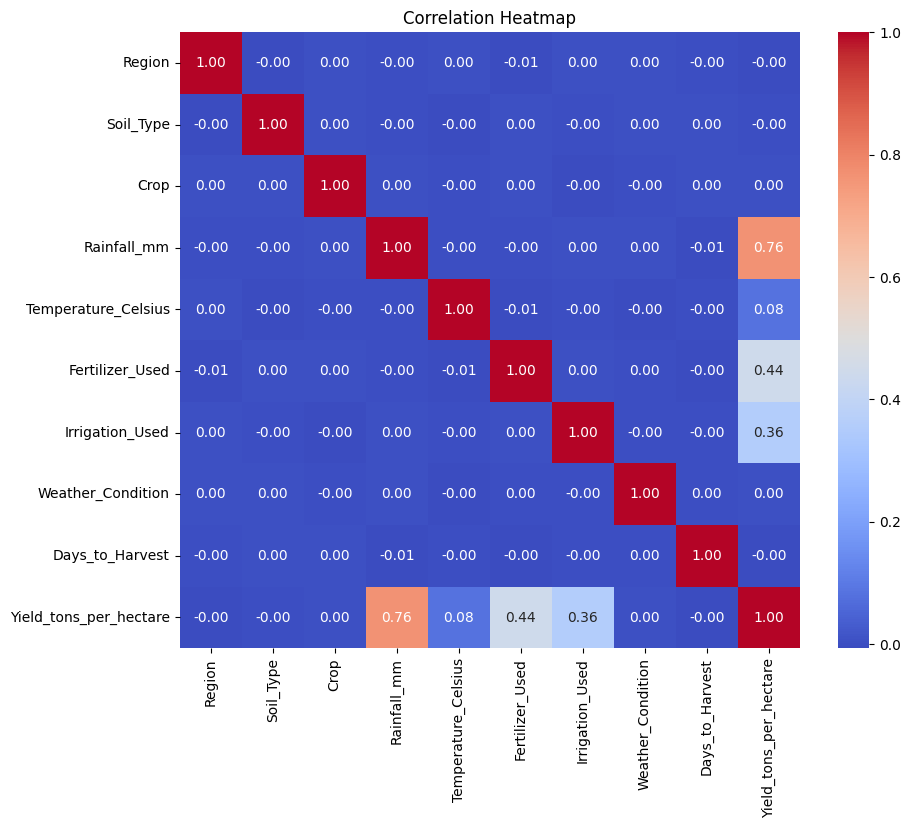

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data_sample.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


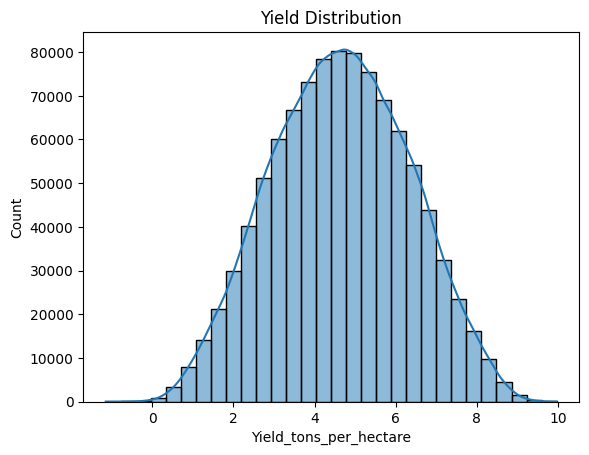

In [19]:
sns.histplot(data['Yield_tons_per_hectare'], kde=True, bins=30)
plt.title('Yield Distribution')
plt.show()


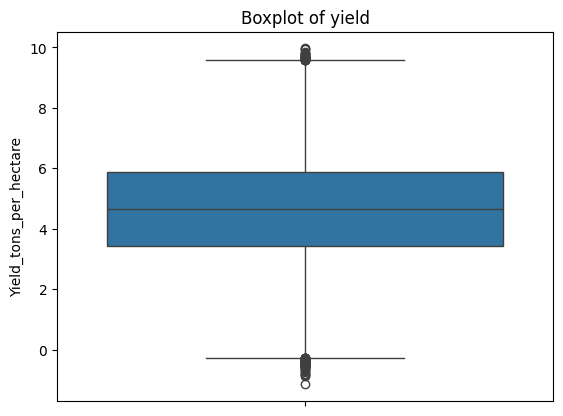

In [20]:
sns.boxplot(data['Yield_tons_per_hectare'])
plt.title('Boxplot of yield')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x = data_sample.drop('Yield_tons_per_hectare',axis = 1)
y = data_sample['Yield_tons_per_hectare']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

print("Number of rows for training: ",x_train.shape[0])
print("Number of rows for testing: ",x_test.shape[0])

Number of rows for training:  80000
Number of rows for testing:  20000


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
y_pred = linear_model.predict(x_test)
y_pred

array([3.53664132, 4.70522572, 6.10202057, ..., 4.10299289, 5.38144344,
       6.83331914])

In [26]:
from sklearn.metrics import mean_absolute_error,r2_score

In [27]:
r2 = r2_score(y_test,y_pred)
print("r2 score is: ",r2)
mae = mean_absolute_error(y_test,y_pred)
print("Mean absolute error is: ",mae)

r2 score is:  0.9139056088318617
Mean absolute error is:  0.39924695993852566


In [28]:
import matplotlib.pyplot as plt

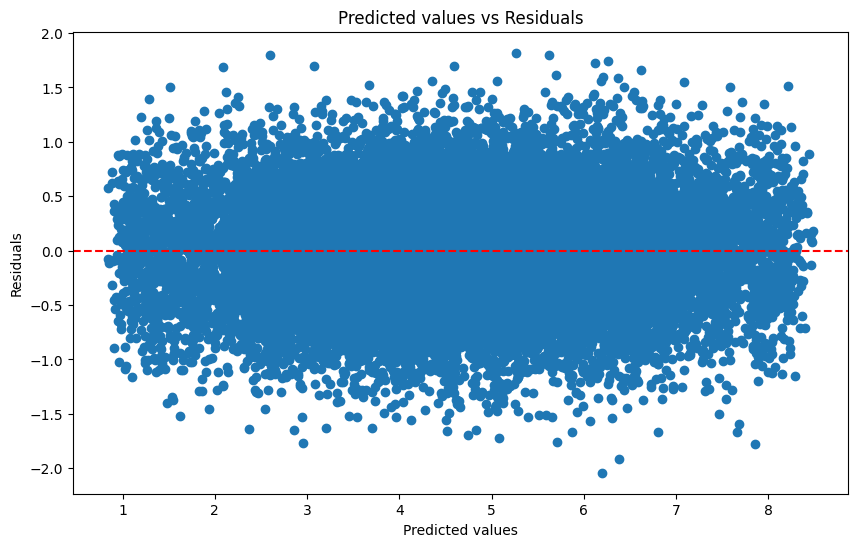

In [29]:
residuals = y_test - y_pred
plt.figure(figsize = (10,6))
plt.scatter(y_pred,residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Predicted values vs Residuals')
plt.show()

In [31]:
import joblib
joblib.dump(linear_model, r'D:\Downloads\crop_yield_model.pkl')

['D:\\Downloads\\crop_yield_model.pkl']